# Descrição do Projeto

A rede de academias Model Fitness está desenvolvendo uma estratégia de interação com o cliente baseados em dados analíticos.

Um dos problemas mais comuns que academias e outros serviços enfrentam é a rotatividade de clientes. Como você sabe se um cliente não está mais com você? Você pode calcular a rotatividade baseado nas pessoas que se livram das suas contas ou não renovam seus contratos. No entanto, às vezes não é óbvio que um cliente saiu: eles podem sair de fininho.

Indicadores de rotatividade varia de área para área. Para uma academia, faz sentido dizer que os clientes saíram se eles não aparecem há um mês. É claro, é possível que eles estejam em Cancun e virão tornar a frequentar quando retornarem, mas esse não é um caso comum. Normalmente, se um cliente ingressa, vem algumas vezes, depois desaparece, ele provavelmente não voltará.

Em vez de lutar com a rotatividade, Model Fitness digitalizou uma parte dos perfis dos clientes. Sua tarefa é analisá-los e vir com uma estratégia de retenção de clientes.

Você deve:

- Aprender a predizer a probabilidade de rotatividade (para o mês seguinte) para cada cliente
- Elabore retratos de usuários típicos: selecione os grupos mais marcantes e descreva suas principais características
- Analise os fatores que mais impactam a rotatividade
- Tire conclusões básicas e desenvolva recomendações sobre como melhorar o serviço de clientes:
    - Identifique grupos alvo
    - Sugira medidas para diminuir a rotatividade
    - Descreva qualquer outro padrão que você vir com respeito às interações com clientes

In [24]:
#importar as bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans

## Baixar dados

In [2]:
# ler o arquivo
df = pd.read_csv('/datasets/gym_churn_us.csv')

# Exibir o dataframe
df.info()
display(df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0


## Análise exploratória de dados

- Estudar a média de valores e desvio padrão

In [3]:
# Exibir as características dos dados
display(df.describe())

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


- Valores médios das carecterísticas por grupo

In [4]:
# Calcular as médias por churn
display(df.groupby('Churn').mean().T)

Churn,0,1
gender,0.510037,0.510839
Near_Location,0.873086,0.768143
Partner,0.534195,0.355325
Promo_friends,0.353522,0.183789
Phone,0.903709,0.902922
Contract_period,5.747193,1.728558
Group_visits,0.464103,0.268615
Age,29.976523,26.989632
Avg_additional_charges_total,158.445715,115.082899
Month_to_end_contract,5.283089,1.662582


- Histogramas e distribuição de características por grupo (churn)

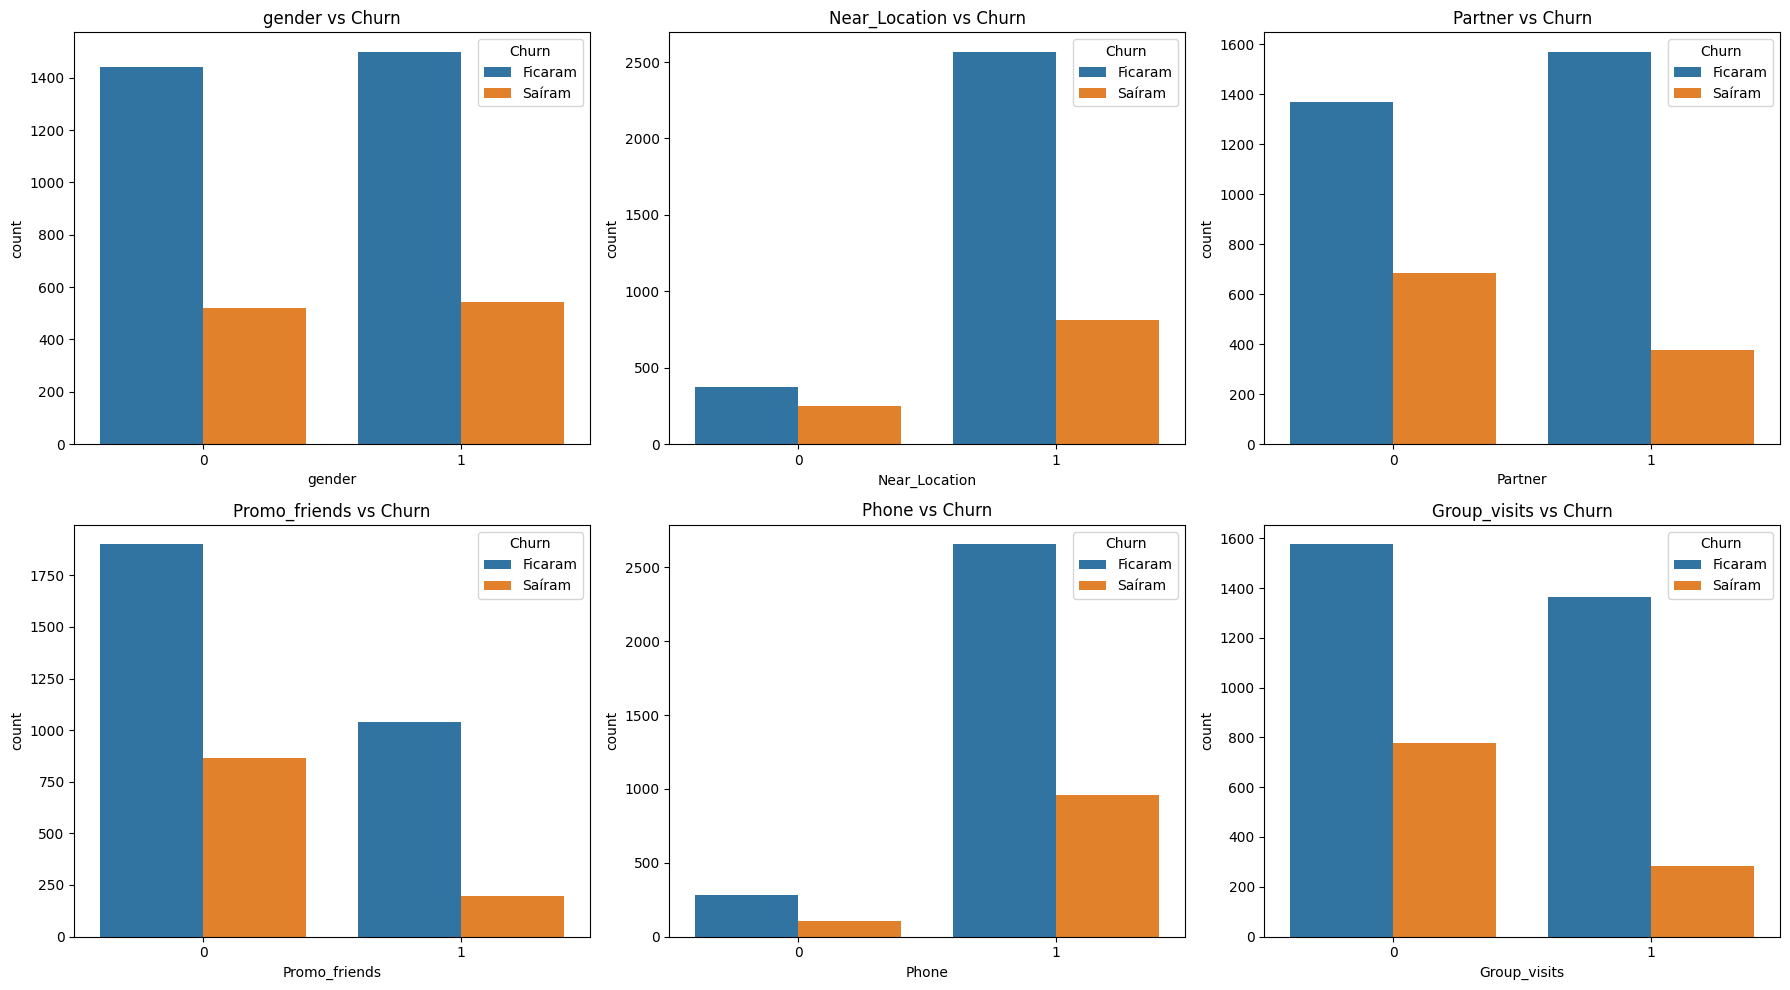

In [5]:
# Histograma de barras para variáveis categoricas

categorical_cols = ['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Group_visits']

# Define o layout do grid
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

# Cria um gráfico de barras para cada variável
for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, hue='Churn', ax=axes[i])
    axes[i].set_title(f'{col} vs Churn')
    axes[i].legend(title='Churn', labels=['Ficaram', 'Saíram'])

plt.tight_layout()
plt.show()

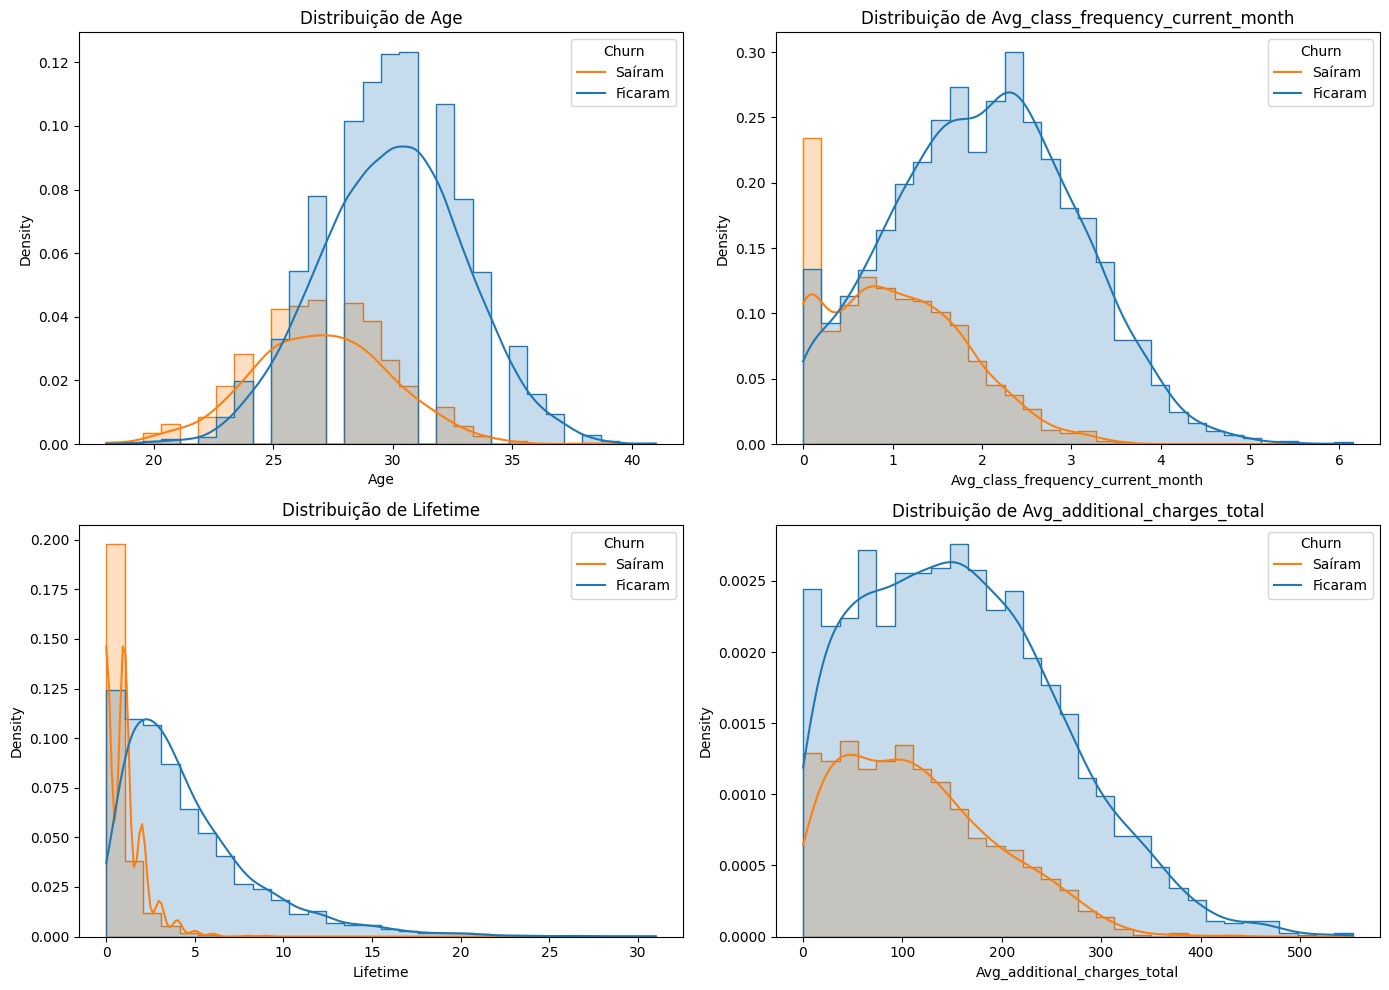

In [6]:
# Distribuições para variáveis numéricas

numeric_cols = ['Age', 'Avg_class_frequency_current_month', 'Lifetime', 'Avg_additional_charges_total']

# Define o layout do grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
axes = axes.flatten()

# Cria um histograma para cada variável
for i, col in enumerate(numeric_cols):
    sns.histplot(data=df, x=col, hue='Churn', kde=True, bins=30, element='step', stat='density', ax=axes[i])
    axes[i].set_title(f'Distribuição de {col}')
    axes[i].legend(title='Churn', labels=['Saíram','Ficaram'])

plt.tight_layout()
plt.show()

- Matriz de correlção

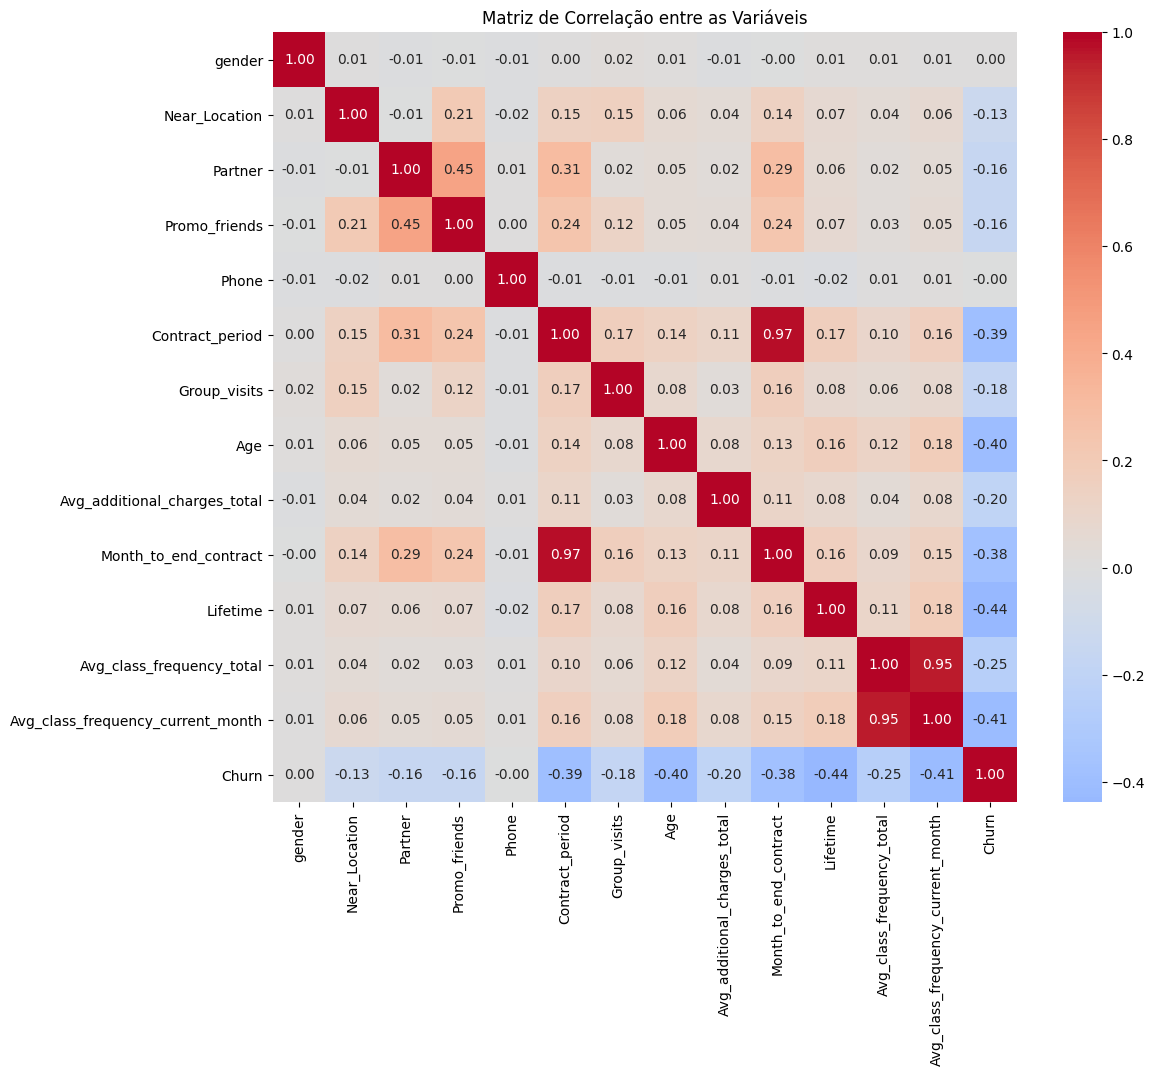

In [7]:
# Criar uma matriz de correlação
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))

# Criar um heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Matriz de Correlação entre as Variáveis')
plt.show()

Com os gráficos de distribuição e a matriz de correlação podemos ver algumas correlações entre os usuários que saíram e os que ficaram e as características. 
Entre elas, as mais aparentes são:
- Clientes que **moram ou trabalham longe da academia** apresentam uma **taxa de rotatividade significativamente maior** — a **proximidade** geográfica está associada a maior **retenção**.
- O fator social, por exemplo se o usuário entrou com um **cupom de oferta de um amigo** ou se o mesmo **treina em grupo**, **diminui as chances de cancelamento**.
- Os usuarios que tendem a ter um **risco maior de sair** são de uma **faixa etária mais jovem** (~24 aos 30).
- A **frequencia de seções** também impacta no risco do usuário sair ou não, com os **clientes mais frequentes** apresentando bem **mais fidelidade**.
- Quanto mais tempo o cliente permanece na academia, menor a chance de sair. **Clientes antigos tendem a ser mais leais**.
- **Contratos mais longos** e **com mais tempo restante** tendem a **reter melhor os usuários**.

## Construir um modelo de classificão binária

In [15]:
# Divisão dos dados
X = df.drop('Churn', axis=1) #características
y = df['Churn'] #variável objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0) #divisão em treino e validação

# Treinamento dos modelos
# Regressão logística
log_model = LogisticRegression(max_iter=1000, random_state=0)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

# Floresta aleatória
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Avaliação dos modelos
def evaluate_model(name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f'{name} - Acurácia: {acc:.2f}, Precisão: {prec:.2f}, Sensibilidade: {recall:.2f}, F1: {f1:.2f}')

evaluate_model("Regressão Logística", y_test, y_pred_log)
evaluate_model("Floresta Aleatória", y_test, y_pred_rf)

Regressão Logística - Acurácia: 0.92, Precisão: 0.86, Sensibilidade: 0.83, F1: 0.84
Floresta Aleatória - Acurácia: 0.92, Precisão: 0.84, Sensibilidade: 0.82, F1: 0.83


Ambos os modelos apresentaram excelente desempenho, com acurácia de 92% em dados de validação — indicando que conseguem prever corretamente a maioria dos casos.

- A **regressão logística teve uma leve vantagem** em precisão (0.86) e sensibilidade (0.83), o que sugere que:
 
  - Ela comete menos falsos positivos (classificar alguém como churn quando não é).
  - E também identifica mais clientes que realmente irão sair, comparado à floresta aleatória.

Conclusão prática: Ambos os modelos são adequados para prever a rotatividade de clientes, mas a **regressão logística é levemente superior** neste cenário e tem a vantagem de ser mais simples de interpretar, o que pode ser útil para decisões de negócio.

## Criar agrupamentos de clientes

In [18]:
# Padronizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

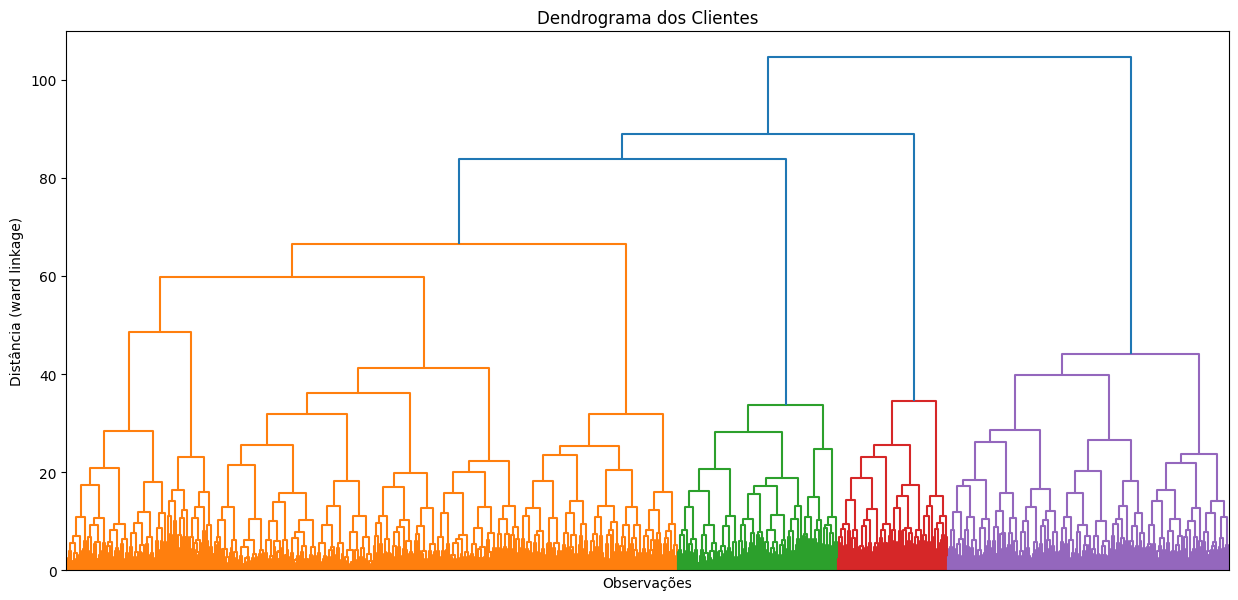

In [23]:
# construir a matriz de linkage
linked = linkage(X_scaled, method='ward')

# visualizar o dendrograma
plt.figure(figsize=(15, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False,
           no_labels=True)

plt.title('Dendrograma dos Clientes')
plt.xlabel('Observações')
plt.ylabel('Distância (ward linkage)')
plt.show()

In [28]:
# Treinamento do modelo KMeans
kmeans = KMeans(n_clusters=5, random_state=0)
clusters = kmeans.fit_predict(X_scaled)

# Adiciona os clusters ao seu DataFrame original
df['Cluster'] = clusters

# Calcula o valor médio por cluster
cluster_means = df.groupby('Cluster').mean().round(2)
display(cluster_means)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
Cluster,,,,,,,,,,,,,,
0,0.50,0.96,0.78,0.57,1.0,10.89,0.54,29.98,160.76,9.95,4.74,1.98,1.97,0.03
1,0.52,0.86,0.47,0.31,0.0,4.79,0.43,29.30,143.96,4.48,3.92,1.85,1.72,0.27
2,0.50,0.00,0.46,0.08,1.0,2.35,0.22,28.48,135.46,2.20,2.81,1.66,1.48,0.44
3,0.49,1.00,0.35,0.24,1.0,1.95,0.34,28.17,131.62,1.86,2.44,1.25,1.01,0.51
4,0.56,0.98,0.36,0.23,1.0,2.67,0.47,30.13,161.66,2.46,4.90,2.85,2.85,0.07


Podemos ver alguns padrões em cada grupo churn, são eles:

- **Cluster 0**: Menor churn (3%). Clientes com contratos longos, alta frequência e gastos elevados — altamente engajados.

- **Cluster 1**: Churn intermediário (27%). Perfil neutro, com valores médios em quase todas as variáveis.

- **Cluster 2**: Churn alto (44%). Sem proximidade com a academia e baixa frequência — indicam afastamento físico e comportamental.

- **Cluster 3**: Maior churn (51%). Novos clientes com baixo engajamento e pouca frequência — alto risco de saída precoce.

- **Cluster 4**: Churn baixo (7%). Clientes ativos e satisfeitos, mesmo com contratos mais curtos.

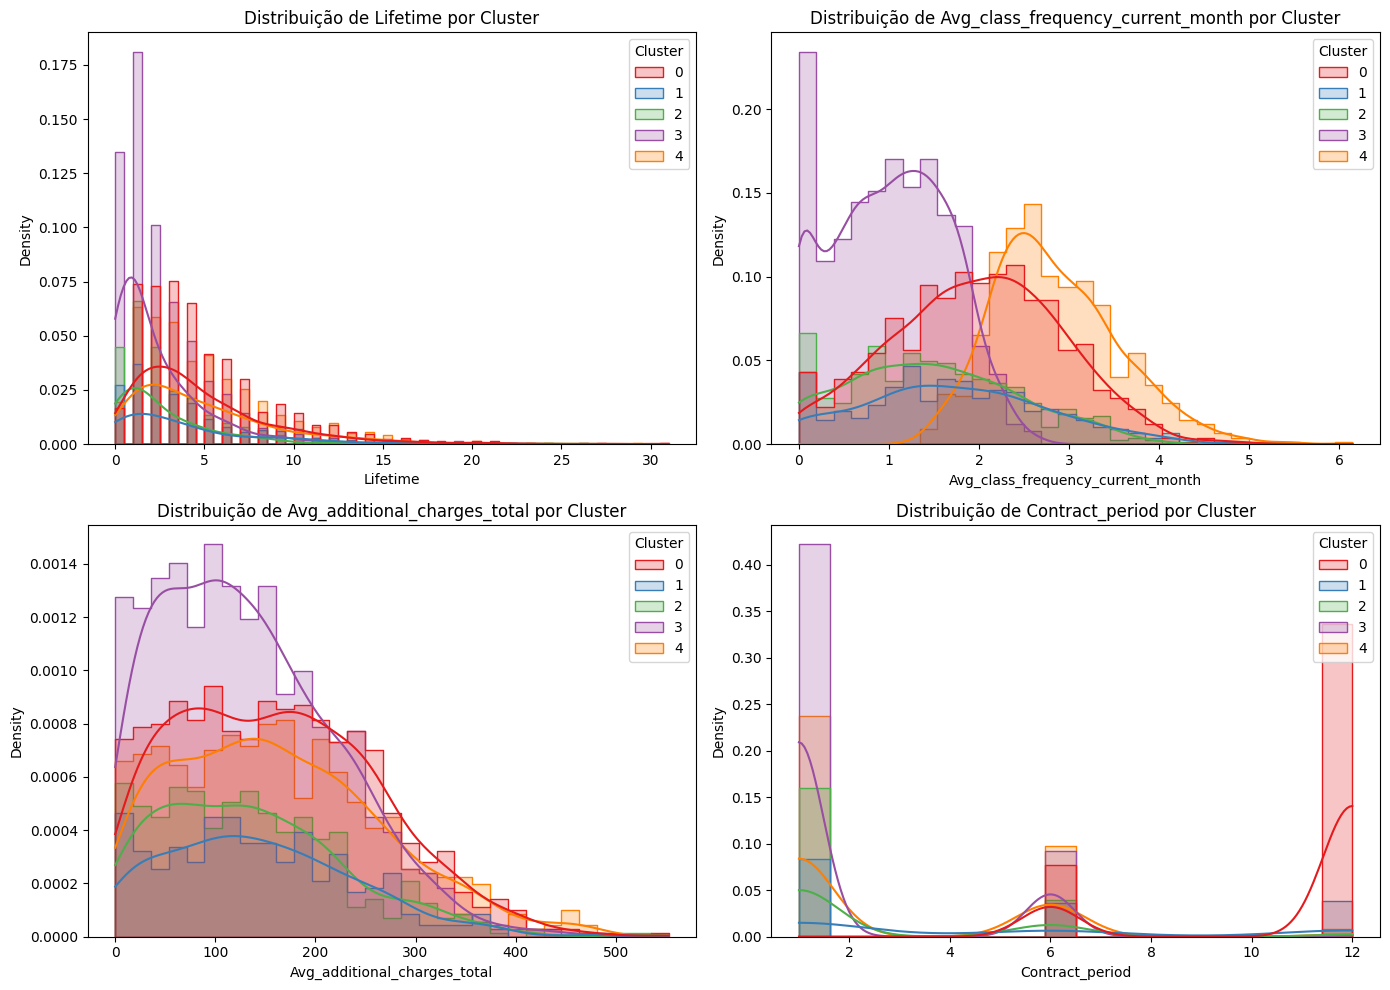

In [29]:
# Variáveis que vamos visualizar
features = ['Lifetime', 'Avg_class_frequency_current_month', 'Avg_additional_charges_total', 'Contract_period']

# Número de gráficos
n = len(features)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Flatten para iterar fácil
axes = axes.flatten()

# Plot
for i, col in enumerate(features):
    sns.histplot(data=df, x=col, hue='Cluster', kde=True, element='step', stat='density', ax=axes[i], palette='Set1')
    axes[i].set_title(f'Distribuição de {col} por Cluster')

plt.tight_layout()
plt.show()


In [34]:
# Calcula a média da variável 'Churn' por cluster
churn_rate_by_cluster = df.groupby('Cluster')['Churn'].mean().sort_values(ascending=False)

# Exibe a taxa de churn formatada
print("Taxa de rotatividade(%):\n")
print((churn_rate_by_cluster * 100).round(2))

Taxa de rotatividade(%):

Cluster
3    51.43
2    44.36
1    26.75
4     6.80
0     2.77
Name: Churn, dtype: float64


Conclusão:
- Grupos 3 e 2 são os mais propensos a sair → foco imediato de retenção.

- Grupos 4 e 0 são clientes leais → estratégias de valorização.

- Grupo 1 é “neutro” → potencial para ser movido para um perfil mais engajado.

##  Conclusões e Recomendações de Retenção de Clientes

### 1. Fortaleça o engajamento inicial  
🔎 *Clusters 2 e 3 têm os maiores índices de churn, especialmente entre novatos e inativos.*

**Recomendações:**
- Ofereça **sessões de boas-vindas obrigatórias** nas primeiras semanas.
- Envie **mensagens automatizadas** com lembretes, dicas e motivação.
- Dê **descontos progressivos** para contratos mais longos após o primeiro mês.

---

### 2. Reforce vínculos com clientes intermediários  
🔎 *Cluster 1 tem churn mediano: nem leal, nem perdido. É um grupo “influenciável”.*

**Recomendações:**
- Implemente **benefícios por frequência**, como recompensas mensais.
- Ofereça **check-ins de bem-estar mensais** com o instrutor.
- Envie **relatórios de progresso personalizados** via e-mail ou app.

---

### 3. Valorize e retenha clientes leais  
🔎 *Clusters 0 e 4 têm baixo churn: são os mais valiosos da base.*

**Recomendações:**
- Crie **programas VIP ou de fidelidade**, com acesso exclusivo a eventos, planos e benefícios.
- Ofereça **descontos por indicação** para cada amigo que se tornar cliente.
- Peça **feedback com frequência** para manter satisfação alta e relação próxima.

---

### 4. Use segmentação para personalizar o marketing  
🔎 *Os clusters possuem perfis e comportamentos bem distintos.*

**Recomendações:**
- Adote **comunicação segmentada** (e-mail, push, SMS) com linguagem e ofertas personalizadas por grupo.
- Monte **campanhas sazonais direcionadas** com base na propensão ao churn.
- Acompanhe o **desempenho por cluster** e ajuste estratégias com base nos dados.
